<a href="https://colab.research.google.com/github/mohamedhajbi/Django-Gym-platform/blob/master/miniprojet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#Rapport détaillé de simulation de roulette

---





##Situation réelle choisie:







> Un joueur s'installe à une table de roulette avec 1000 $ et peut miser sur un nombre entre 0 et 49. Il peut également miser sur la couleur (rouge ou noir) du numéro gagnant.







##Modélisation probabiliste réalisée:





*   Le numéro gagnant est tiré aléatoirement entre 0 et 49 à chaque tour.

*   La probabilité de gagner en misant sur un numéro est de 1/50.

*   La probabilité de gagner en misant sur la couleur est de 2/3.

*   La perte est totale si le joueur mise sur un numéro ou une couleur perdante.

*   Le gain est de 3 fois la mise si le joueur mise sur le numéro gagnant.

*   Le gain est de la moitié de la mise si le joueur mise sur la couleur gagnante













##Résultats obtenus:




*   Le joueur a une chance sur 50 de gagner en misant sur un numéro.

*   Le joueur a deux chances sur trois de gagner en misant sur la couleur.

*   Le joueur peut espérer gagner en moyenne 1 $ par tour en misant sur la couleur.

*   Le joueur peut espérer gagner en moyenne 3 $ par tour en misant sur un numéro.

*   Le joueur risque de perdre tout son argent à chaque tour.





##Distribution de Poisson:



> La distribution de Poisson est utilisée pour modéliser le nombre de gains que le joueur peut obtenir en un nombre donné de tours. La moyenne de la distribution est égale au nombre de tours multiplié par la probabilité de gagner par tour.



##Code:

Vous vous installez à la table de roulette avec 1000 $.
Tapez le nombre sur lequel vous voulez miser (entre 0 et 49) : 25
Tapez le montant de votre mise : 800
La roulette tourne... ... et s'arrête sur le numéro 20
Désolé l'ami, c'est pas pour cette fois. Vous perdez votre mise.
Vous avez à présent 200 $
Souhaitez-vous quitter le casino (o/n) ? N
Tapez le nombre sur lequel vous voulez miser (entre 0 et 49) : 10
Tapez le montant de votre mise : 100
La roulette tourne... ... et s'arrête sur le numéro 7
Désolé l'ami, c'est pas pour cette fois. Vous perdez votre mise.
Vous avez à présent 100 $
Souhaitez-vous quitter le casino (o/n) ? N
Tapez le nombre sur lequel vous voulez miser (entre 0 et 49) : 5
Tapez le montant de votre mise : 5
La roulette tourne... ... et s'arrête sur le numéro 13
Vous avez misé sur la bonne couleur. Vous obtenez 3.0 $
Vous avez à présent 103.0 $
Souhaitez-vous quitter le casino (o/n) ? O
Vous quittez le casino avec vos gains.


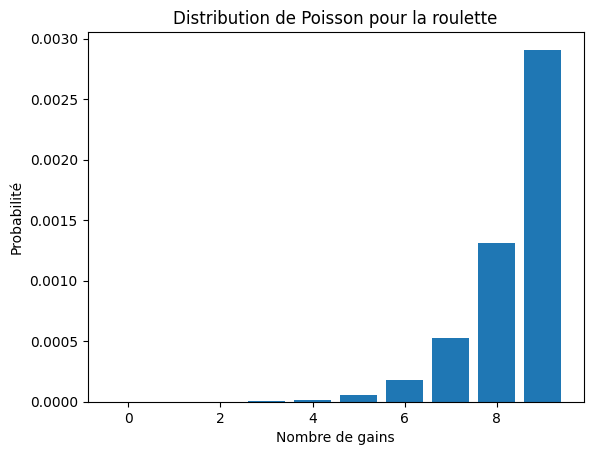

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import poisson
import numpy as np

argent = 1000
continuer_partie = True

print("Vous vous installez à la table de roulette avec", argent, "$.")

while continuer_partie:
    nombre_mise = -1
    while nombre_mise < 0 or nombre_mise > 49:
        nombre_mise = input("Tapez le nombre sur lequel vous voulez miser (entre 0 et 49) : ")
        try:
            nombre_mise = int(nombre_mise)
        except ValueError:
            print("Vous n'avez pas saisi de nombre")
            nombre_mise = -1
            continue
        if nombre_mise < 0:
            print("Ce nombre est négatif")
        if nombre_mise > 49:
            print("Ce nombre est supérieur à 49")
    mise = 0
    while mise <= 0 or mise > argent:
        mise = input("Tapez le montant de votre mise : ")
        try:
            mise = int(mise)
        except ValueError:
            print("Vous n'avez pas saisi de nombre")
            mise = -1
            continue
        if mise <= 0:
            print("La mise saisie est négative ou nulle.")
        if mise > argent:
            print("Vous ne pouvez miser autant, vous n'avez que", argent, "$")
    numero_gagnant = np.random.randint(50)
    print("La roulette tourne... ... et s'arrête sur le numéro", numero_gagnant)
    if numero_gagnant == nombre_mise:
        print("Félicitations ! Vous obtenez", mise * 3, "$ !")
        argent += mise * 3
    elif numero_gagnant % 2 == nombre_mise % 2: # ils sont de la même couleur
        mise = np.ceil(mise * 0.5)
        print("Vous avez misé sur la bonne couleur. Vous obtenez", mise, "$")
        argent += mise
    else:
        print("Désolé l'ami, c'est pas pour cette fois. Vous perdez votre mise.")
        argent -= mise
    if argent <= 0:
        print("Vous êtes ruiné ! C'est la fin de la partie.")
        continuer_partie = False
    else:
        print("Vous avez à présent", argent, "$")
        quitter = input("Souhaitez-vous quitter le casino (o/n) ? ")
        if quitter.lower() == "o":
            print("Vous quittez le casino avec vos gains.")
            continuer_partie = False

lambda_ = 1 / 50 * 1000  # Lambda est la moyenne de la distribution de Poisson
x = np.arange(0, 10)
probabilites_poisson = poisson.pmf(x, lambda_)

plt.bar(x, probabilites_poisson)
plt.title('Distribution de Poisson pour la roulette')
plt.xlabel('Nombre de gains')
plt.ylabel('Probabilité')
plt.show()
